In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#Comprises of data from 2015-2020
df = pd.read_csv('https://raw.githubusercontent.com/dymarczykm1/dymarczykm1/main/Data/InterestRatesNew.csv')

#Creating a rates data frame
rates = df

#Setting the date as the index
rates.set_index('Date',inplace=True)

#Converting the index as date
rates.index = pd.to_datetime(df.index)

#Removing column truncation and 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [3]:
#Creating a correlation matrix 
rates_corr = rates.corr()

#Looking at standard deviation
rates_std = rates.std()

#Taking the difference of rate changes day over day
difference = rates-rates.shift()


#Dropping NaN from the data frame and making a correlation matrix of the difference
diff = difference.dropna()
diff_corr = difference.corr()
#Differebce data correlation

#Taking the standard deviation of the difference
diff_std = diff.std()

In [4]:
rates.corr()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
3 Mo,1.000000,0.995949,0.981152,0.937351,0.885527,0.778274,0.694376,0.634990,0.536673,0.464819
6 Mo,0.995949,1.000000,0.993525,0.960901,0.916208,0.818324,0.739518,0.682193,0.584436,0.518046
1 Yr,0.981152,0.993525,1.000000,0.984244,0.950979,0.867958,0.796859,0.742791,0.646919,0.584525
2 Yr,0.937351,0.960901,0.984244,1.000000,0.989766,0.936935,0.881600,0.834620,0.746619,0.689588
3 Yr,0.885527,0.916208,0.950979,0.989766,1.000000,0.975948,0.936459,0.897885,0.821260,0.768425
5 Yr,0.778274,0.818324,0.867958,0.936935,0.975948,1.000000,0.989778,0.969557,0.918634,0.876063
7 Yr,0.694376,0.739518,0.796859,0.881600,0.936459,0.989778,1.000000,0.993918,0.963167,0.930161
10 Yr,0.634990,0.682193,0.742791,0.834620,0.897885,0.969557,0.993918,1.000000,0.985823,0.960621
20 Yr,0.536673,0.584436,0.646919,0.746619,0.821260,0.918634,0.963167,0.985823,1.000000,0.981537
30 Yr,0.464819,0.518046,0.584525,0.689588,0.768425,0.876063,0.930161,0.960621,0.981537,1.000000


In [5]:
rates.std()

3 Mo     0.862251
6 Mo     0.871499
1 Yr     0.870319
2 Yr     0.834057
3 Yr     0.797055
5 Yr     0.738686
7 Yr     0.692375
10 Yr    0.655144
20 Yr    0.554447
30 Yr    0.553120
dtype: float64

In [6]:
diff_corr

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
3 Mo,1.000000,0.634218,0.441966,0.271738,0.249775,0.210243,0.186393,0.183328,0.165799,0.162661
6 Mo,0.634218,1.000000,0.636269,0.444258,0.412709,0.371157,0.333667,0.320334,0.279153,0.267081
1 Yr,0.441966,0.636269,1.000000,0.666945,0.642082,0.579920,0.533656,0.494009,0.427434,0.404170
2 Yr,0.271738,0.444258,0.666945,1.000000,0.917503,0.864603,0.805191,0.740030,0.635490,0.593693
3 Yr,0.249775,0.412709,0.642082,0.917503,1.000000,0.942221,0.897040,0.837527,0.734294,0.690109
5 Yr,0.210243,0.371157,0.579920,0.864603,0.942221,1.000000,0.967606,0.924803,0.837357,0.794255
7 Yr,0.186393,0.333667,0.533656,0.805191,0.897040,0.967606,1.000000,0.970295,0.908476,0.873142
10 Yr,0.183328,0.320334,0.494009,0.740030,0.837527,0.924803,0.970295,1.000000,0.956916,0.933448
20 Yr,0.165799,0.279153,0.427434,0.635490,0.734294,0.837357,0.908476,0.956916,1.000000,0.975099
30 Yr,0.162661,0.267081,0.404170,0.593693,0.690109,0.794255,0.873142,0.933448,0.975099,1.000000


In [7]:
diff_std

3 Mo     0.022260
6 Mo     0.021205
1 Yr     0.022607
2 Yr     0.032769
3 Yr     0.037018
5 Yr     0.042194
7 Yr     0.044998
10 Yr    0.044988
20 Yr    0.046857
30 Yr    0.046585
dtype: float64

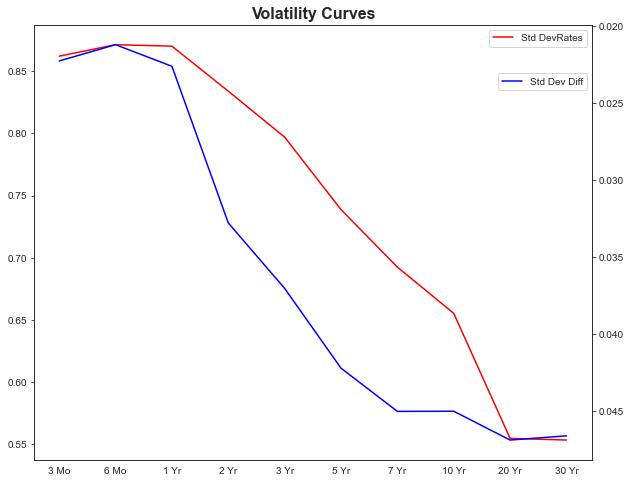

In [9]:
#Interesting.

sns.set_style('white') # setting style
plt.subplots(figsize=(10, 8)) # setting figure size
sns.lineplot(data=rates_std, label='Std DevRates', color="r")
ax2 = plt.twinx()
sns.lineplot(data=diff_std, label='Std Dev Diff', color="b", ax=ax2)
plt.title('Volatility Curves', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(1.0, 0.9))
plt.show()